In [1]:
# In Class Lab 6
# Surface Brightness Profiles

# Load Modules
import numpy as np
import astropy.units as u

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
# my modules
from galaxy.galaxy import Galaxy
from galaxy.galaxies import Galaxies
from galaxy.centerofmass import CenterOfMass
from galaxy.massprofile import MassProfile

In [3]:
from galaxy.utilities import sersic

# Lab 6: Sersic Profiles

In this lab we will use Homework 5 solutions to compute the mass profile of the Milky Way's bulge. 
We will turn the mass profile into a density profile and see if we can fit it reasonably well 
with a sersic profile. 

# Part A : 

Create a function called `SersicE` that returns the Sersic Profile in terms of the effective radius $R_e$ (i.e. the half light radius).

$I(r) = I_e exp^{-7.67 ( (r/R_e)^{1/n} - 1)}$

Where 

$ L = 7.2 I_e \pi R_e^2$

and  $R_e$ is the half light radius.  We will assume a mass to light ratio for the stellar bulge of 1, so this is also the half mass radius.

The function should take as input the radius, $R_e$, $n$ and the total stellar mass of the system.


# Part B

a) Create an instance of the MassProfile Class for the MW. Store it as a variable `MW`. 


In [4]:
# a)  Create a mass profile object for the Milky Way
gal = Galaxy('MW')
MW = MassProfile(gal)

b) Create an array of radii from 0.1 kpc to 30 kpc in increments of 0.1


In [5]:
# b) Array of radii 
R = np.arange(0.1, 30, 0.1) * u.kpc

c) Define a new array called `BulgeMass`, that uses the function `MassEnclosed` within MassProfile to compute themass profile of the bulge.  Get rid of astropy units in `BulgeMass` by adding `.value` 

In [6]:
# c) Use Mass Profile to return the Bulge Mass Profile at each value of R
# Recall that particle type 3 = bulge
BulgeMass = MW.mass_enclosed(R, 3).value  # Get rid of astropy units

d) Compute the surface mass density profile for the simulated bulge and store it as an array called `BulgeI`. Assuming M/L ~ 1 this is also the surface brightness profile in Lsun/kpc^2

In [7]:
# d) Surface brightness profile
# Density of Light  Assume M ~ L 
# I = L/4piD^2
BulgeI = BulgeMass / (4 * np.pi * R**2)

# Part C

Compute $R_e$, the half mass radius, for the bulge

In [8]:
# Determine the total mass of the Bulge
BulgeTotal = np.max(BulgeMass)
BulgeTotal

9613804499.999998

In [9]:
# Find the effective radius of the bulge, which encloses half of the mass
Blow = BulgeTotal / 2.0
Bhigh = BulgeTotal / 2.0 + BulgeTotal / 2.0 * 0.01
index = np.where((BulgeMass > Blow) & (BulgeMass < Bhigh))

In [10]:
# Effective radius of the bulge
ReBulge = R[index]
print(ReBulge)

[1.4] kpc


In [11]:
# Double check
print(BulgeMass[index])

[4.8494235e+09]


In [12]:
# Double check
print(BulgeTotal/2/1e9)

4.806902249999999


# Part D

a) Plot the surface density profile of the simulated bulge

b) Plot the Sersic profile, assuming a de Vaucouleurs Profile.

c) If the profiles don't match, try changing either $R_e$ or $n$

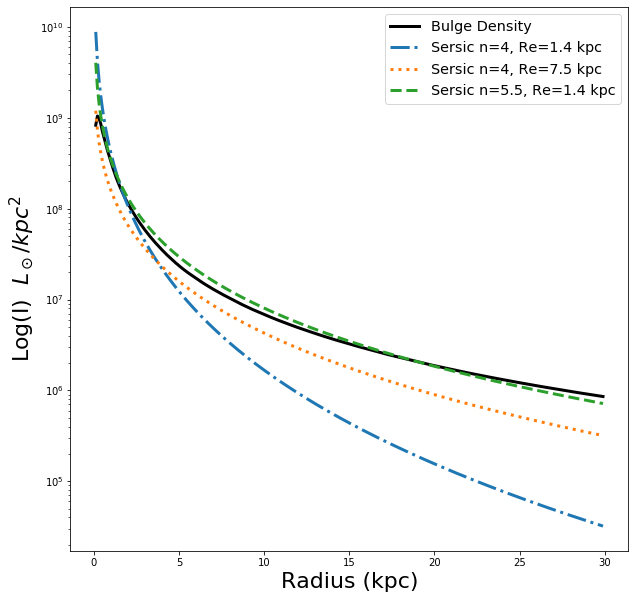

In [13]:
# Plot the Bulge density profile vs 
# the Sersic profile
####################################


fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# plot the bulge luminosity density as a proxy for surface brighntess
plt.semilogy(R, BulgeI, color='black',lw=3, label='Bulge Density')


# Sersic fit to the surface brightness Sersic fit
n_vals = [4, 4, 5.5]
Re_vals = [ReBulge[0], 7.5*u.kpc, ReBulge[0]]
linestyles = ['-.', ':', '--']
for i, n in enumerate(n_vals):
    plt.semilogy(R.value, sersic(R, Re_vals[i], n, BulgeTotal), lw=3, ls=linestyles[i],
                 label=f'Sersic n={n}, Re={Re_vals[i]:.1f}')

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# Add axis labels
plt.xlabel('Radius (kpc)', fontsize=22)
plt.ylabel('Log(I)  $L_\odot/kpc^2$', fontsize=22)

# add a legend with some customizations.
legend = ax.legend(loc='upper right',fontsize='x-large');